# Análisis Exploratorio de Datos

### Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = font_manager.findfont("DejaVu Serif")
plt.rc('font', family='serif')
plt.rc('font', serif='DejaVu Serif')

import nltk
from nltk.util import ngrams

import numpy as np
np.set_printoptions(threshold=np.inf)

from scipy import stats
import seaborn as sns
import math
import pandas as pd
from scipy.stats import norm
from collections import Counter
from wordcloud import WordCloud
#import re

### Carga de Datos limpios

In [2]:
df_clean = pd.read_csv('../data/train_clean.csv')

### Cantidad de palabras

In [3]:
# Calculamos cuantas palabras tiene cada noticia
df_clean['n_words'] = df_clean['text'].apply(lambda x: len(x.split()))

In [4]:
# Calculamos algunas medidas de la cantidad de palabras por noticia
print('Reales \t -> Media:\t\t', 	df_clean[df_clean['label'] == 0]['n_words'].mean())
print('\t -> Varianza:\t\t', 		df_clean[df_clean['label'] == 0]['n_words'].var())
print('\t -> Desviación Típica:\t', df_clean[df_clean['label'] == 0]['n_words'].std())
print('')
print('Fake \t -> Media:\t\t', 		df_clean[df_clean['label'] == 1]['n_words'].mean())
print('\t -> Varianza:\t\t', 		df_clean[df_clean['label'] == 1]['n_words'].var())
print('\t -> Desviación Típica:\t', df_clean[df_clean['label'] == 1]['n_words'].std())
print('')
print('Total \t -> Media:\t\t', 	df_clean['n_words'].mean())
print('\t -> Varianza:\t\t', 		df_clean['n_words'].var())
print('\t -> Desviación Típica:\t', df_clean['n_words'].std())

Reales 	 -> Media:		 490.05603157793394
	 -> Varianza:		 153138.7898507242
	 -> Desviación Típica:	 391.32951569070815

Fake 	 -> Media:		 359.4703735714972
	 -> Varianza:		 259685.52997601294
	 -> Desviación Típica:	 509.593494832904

Total 	 -> Media:		 424.68158653846154
	 -> Varianza:		 210732.1825158731
	 -> Desviación Típica:	 459.05575098878035


#### Palabras / noticia

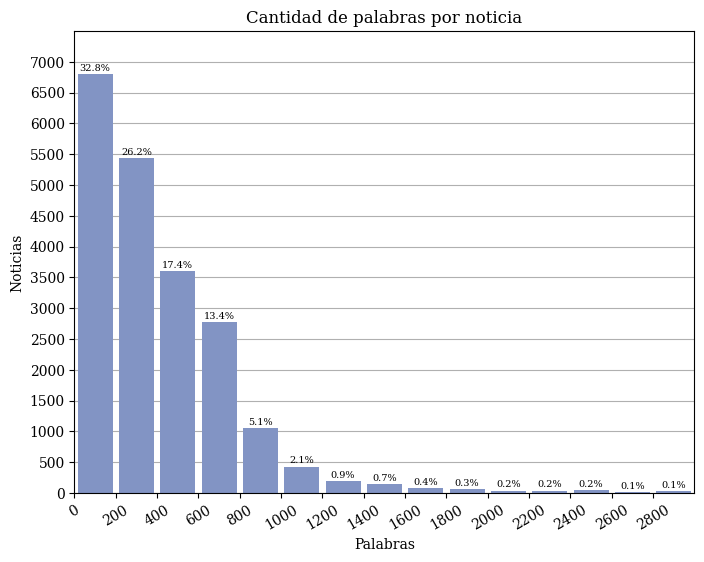

In [5]:
# Hacemos un histograma de la cantidad de palabras por noticia
plt.figure(figsize=(8, 6))
bin_edges = np.arange(0, 3200, 200)
n, bins, patches = plt.hist(df_clean['n_words'], bins=bin_edges, color='#8294c4', rwidth=0.85)
plt.title('Cantidad de palabras por noticia')
plt.xlabel('Palabras')
plt.ylabel('Noticias')
plt.xlim(0, 3000)
plt.ylim(0, 7500)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_xticks(np.arange(0, 3000, 200))
plt.xticks(rotation=30)
plt.gca().set_yticks(np.arange(0, 7500, 500))

# Calcular los porcentajes
porcentajes = [(100 * value / sum(n)) for value in n]

# Agregar etiquetas a las barras
for patch, porcentaje in zip(patches, porcentajes):
	height = patch.get_height()
	width = patch.get_width()
	if patch.get_x() + width / 2 + 10 < plt.xlim()[1]:
		plt.text(patch.get_x() + patch.get_width() / 2, height + 60, f'{porcentaje:.1f}%', ha='center', fontsize=7)
  
plt.savefig('../images/cantidad_palabras.png', bbox_inches='tight', dpi=300)
plt.show()

#### Palabras / Label

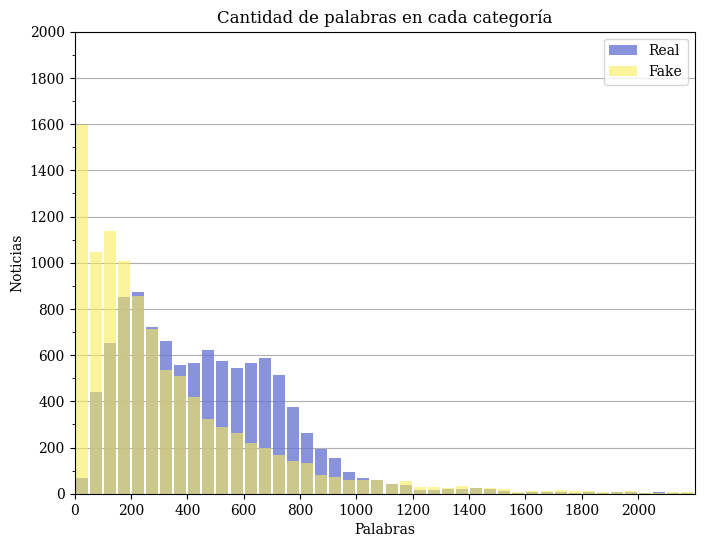

In [6]:
# Hacemos un histograma de la cantidad de palabras por noticia en cada label
plt.figure(figsize=(8, 6))
bin_edges = np.arange(0, 3200, 50)
plt.hist(df_clean[df_clean['label'] == 0]['n_words'], bins=bin_edges, alpha=0.8, color='#6c78d4', label='Real', rwidth=0.85)
plt.hist(df_clean[df_clean['label'] == 1]['n_words'], bins=bin_edges, alpha=0.6, color='#faed57', label='Fake', rwidth=0.85)
plt.title('Cantidad de palabras en cada categoría')
plt.xlabel('Palabras')
plt.ylabel('Noticias')
plt.xlim(0, 2200)
plt.ylim(0, 2000)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_xticks(np.arange(0, 2200, 200))
plt.gca().set_yticks(np.arange(0, 2100, 200))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(100))
plt.legend()
plt.savefig('../images/cantidad_palabras_label.png', bbox_inches='tight', dpi=300)
plt.show()

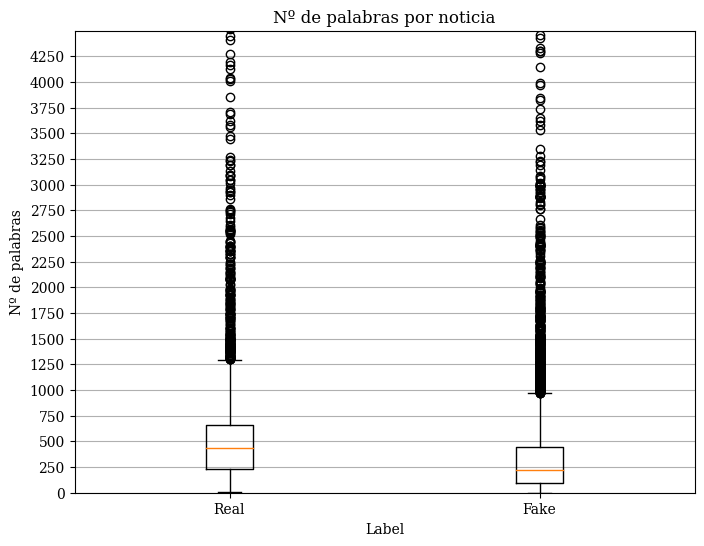

In [7]:
# Hacemos un boxplot de lo mismo.
plt.figure(figsize=(8, 6))
plt.boxplot([df_clean[df_clean['label'] == 0]['n_words'], df_clean[df_clean['label'] == 1]['n_words']], labels=['Real', 'Fake'])
plt.xlabel('Label')
plt.ylabel('Nº de palabras')
plt.title('Nº de palabras por noticia')
plt.ylim(0, 4500)
plt.gca().set_axisbelow(True)
plt.gca().set_yticks(np.arange(0, 4500, 250))
plt.gca().yaxis.grid(True, which='major')
plt.savefig('../images/cantidad_palabras_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

#### Palabras distintas / noticia

In [4]:
# Calculamos la cantidad de palabras distintas por cada noticia y las guarda en una nueva columna
df_clean['n_unique_words'] = df_clean['text'].apply(lambda x: len(set(x.split())))

In [9]:
# Calculamos algunas medidas de la cantidad de palabras distintas
print('Reales \t -> Media:\t\t', 	df_clean[df_clean['label'] == 0]['n_unique_words'].mean())
print('\t -> Varianza:\t\t', 		df_clean[df_clean['label'] == 1]['n_unique_words'].mean())
print('\t -> Desviación Típica:\t', df_clean['n_unique_words'].mean())
print('')
print('Fake \t -> Media:\t\t', 		df_clean[df_clean['label'] == 0]['n_unique_words'].var())
print('\t -> Varianza:\t\t', 		df_clean[df_clean['label'] == 1]['n_unique_words'].var())
print('\t -> Desviación Típica:\t', df_clean['n_unique_words'].var())
print('')
print('Total \t -> Media:\t\t', 	df_clean['n_unique_words'].mean())
print('\t -> Varianza:\t\t', 		df_clean['n_unique_words'].var())
print('\t -> Desviación Típica:\t', df_clean['n_unique_words'].std())

Reales 	 -> Media:		 285.8857225377876
	 -> Varianza:		 206.49284548160952
	 -> Desviación Típica:	 246.13966346153848

Fake 	 -> Media:		 32188.88227928484
	 -> Varianza:		 46110.029842200194
	 -> Desviación Típica:	 40732.15545351431

Total 	 -> Media:		 246.13966346153848
	 -> Varianza:		 40732.15545351431
	 -> Desviación Típica:	 201.8220886164701


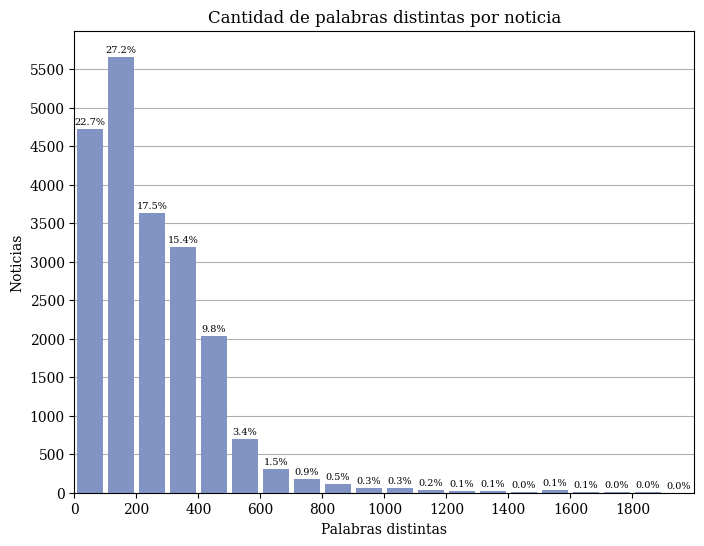

In [10]:
# Hacemos un histograma de la cantidad de palabras distintas por noticia
plt.figure(figsize=(8, 6))
bin_edges = np.arange(0, 3200, 100)
n, bins, patches = plt.hist(df_clean['n_unique_words'], bins=bin_edges, rwidth=0.85, color='#8294c4')
plt.title('Cantidad de palabras distintas por noticia')
plt.xlabel('Palabras distintas')
plt.ylabel('Noticias')
plt.xlim(0, 2000)
plt.ylim(0, 6000)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_xticks(np.arange(0, 2000, 200))
plt.gca().set_yticks(np.arange(0, 6000, 500))

# Calcular los porcentajes
porcentajes = [(100 * value / sum(n)) for value in n]

# Agregar etiquetas a las barras
for patch, porcentaje in zip(patches, porcentajes):
	height = patch.get_height()
	width = patch.get_width()
	if patch.get_x() + width / 2 + 10 < plt.xlim()[1]:
		plt.text(patch.get_x() + patch.get_width() / 2, height + 60, f'{porcentaje:.1f}%', ha='center', fontsize=7)
  
plt.savefig('../images/cantidad_palabras_distintas.png', bbox_inches='tight', dpi=300)
plt.show()

#### Palabras distintas / Label

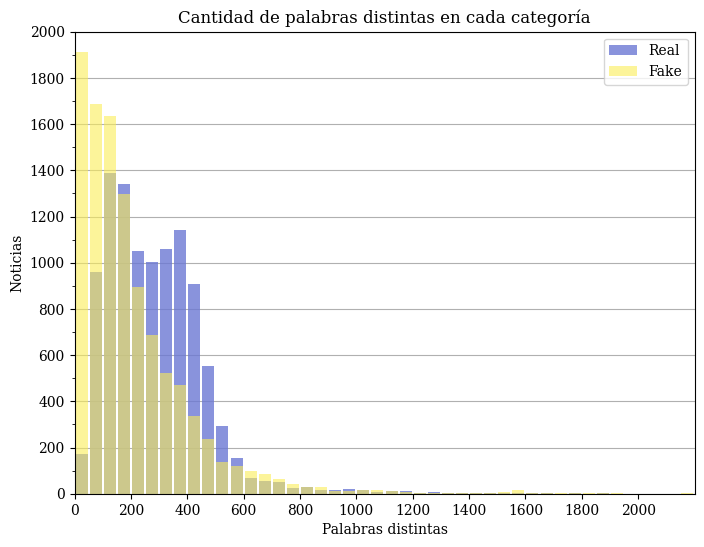

In [15]:
# Hacemos un histograma de la cantidad de palabras por noticia en cada label
plt.figure(figsize=(8, 6))
bin_edges = np.arange(0, 3200, 50)
plt.hist(df_clean[df_clean['label'] == 0]['n_unique_words'], bins=bin_edges, alpha=0.8, color='#6c78d4', label='Real', rwidth=0.85)
plt.hist(df_clean[df_clean['label'] == 1]['n_unique_words'], bins=bin_edges, alpha=0.6, color='#faed57', label='Fake', rwidth=0.85)
plt.title('Cantidad de palabras distintas en cada categoría')
plt.xlabel('Palabras distintas')
plt.ylabel('Noticias')
plt.xlim(0, 2200)
plt.ylim(0, 2000)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_xticks(np.arange(0, 2200, 200))
plt.gca().set_yticks(np.arange(0, 2100, 200))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(100))
plt.legend()
plt.savefig('../images/cantidad_palabras_distintas_label.png', bbox_inches='tight', dpi=300)
plt.show()

#### Palabras distintas / Palabras

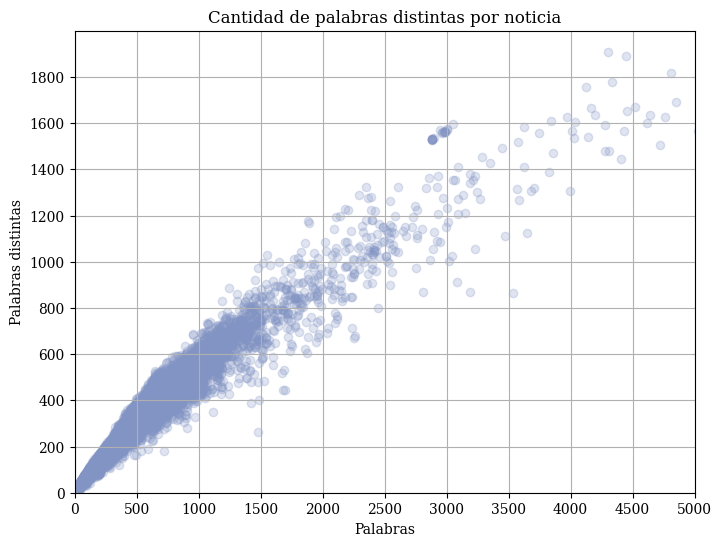

In [16]:
# Hacemos un gráfico de dispersión de la cantidad de palabras y cantidad de palabras distintas por noticia
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['n_words'], df_clean['n_unique_words'], color='#8294c4', alpha=0.25)
plt.title('Cantidad de palabras distintas por noticia')
plt.xlabel('Palabras')
plt.ylabel('Palabras distintas')

plt.xlim(0, 5000)
plt.ylim(0, 2000)
plt.gca().set_xticks(np.arange(0, 5500, 500))
plt.gca().set_yticks(np.arange(0, 2000, 200))
plt.gca().xaxis.grid(True, which='major')
plt.gca().yaxis.grid(True, which='major')
plt.savefig('../images/dispersion_palabras_distintas.png', bbox_inches='tight', dpi=300)
plt.show()

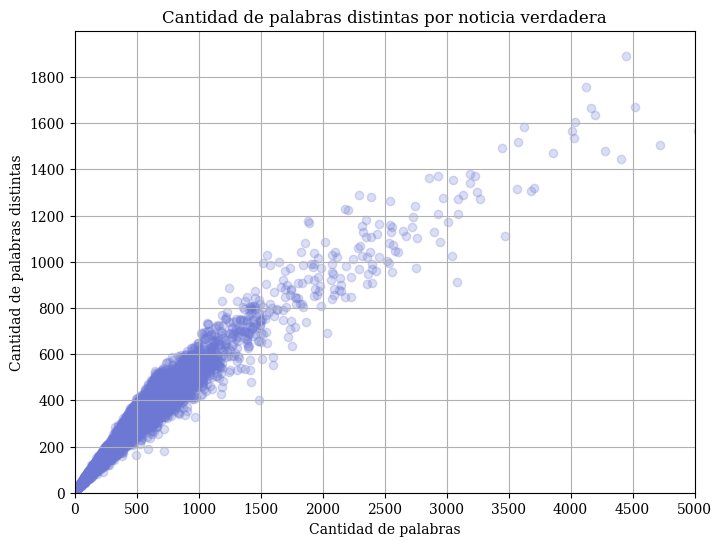

In [18]:
# Hacemos un gráfico de dispersión de la cantidad de palabras y cantidad de palabras distintas por noticia verdadera
plt.figure(figsize=(8, 6))
plt.scatter(df_clean[df_clean['label'] == 0]['n_words'], df_clean[df_clean['label'] == 0]['n_unique_words'], color='#6c78d4', alpha=0.25)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Cantidad de palabras distintas')
plt.title('Cantidad de palabras distintas por noticia verdadera')
plt.xlim(0, 5000)
plt.ylim(0, 2000)
plt.gca().set_xticks(np.arange(0, 5500, 500))
plt.gca().set_yticks(np.arange(0, 2000, 200))
plt.gca().xaxis.grid(True, which='major')
plt.gca().yaxis.grid(True, which='major')
plt.savefig('../images/dispersion_palabras_distintas_verdaderas.png', bbox_inches='tight', dpi=300)
plt.show()

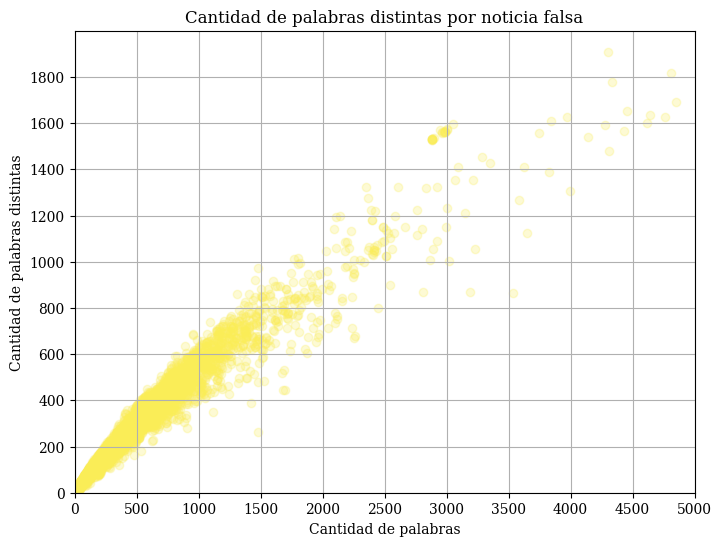

In [19]:
# Hacemos un gráfico de dispersión de la cantidad de palabras y cantidad de palabras distintas por noticia falsa
plt.figure(figsize=(8, 6))
plt.scatter(df_clean[df_clean['label'] == 1]['n_words'], df_clean[df_clean['label'] == 1]['n_unique_words'], color='#faed57', alpha=0.25)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Cantidad de palabras distintas')
plt.title('Cantidad de palabras distintas por noticia falsa')
plt.xlim(0, 5000)
plt.ylim(0, 2000)
plt.gca().set_xticks(np.arange(0, 5500, 500))
plt.gca().set_yticks(np.arange(0, 2000, 200))
plt.gca().yaxis.grid(True, which='major')
plt.gca().xaxis.grid(True, which='major')
plt.savefig('../images/dispersion_palabras_distintas_falsas.png', bbox_inches='tight', dpi=300)
plt.show()

### Palabras más frecuentes en cada set

In [20]:
# Utilizamos Counter para calcular la frecuencia de las palabras por label y en global
words = Counter()
words_real = Counter()
words_fake = Counter()
for idx, row in df_clean.iterrows():
	words.update(row['text'].split())
	if row['label'] == 0:
		words_real.update(row['text'].split())
	else:
		words_fake.update(row['text'].split())
	
# Pasamos a dataframes con palabras y cantidad
words_df = pd.DataFrame.from_dict(words, orient='index', columns=['count'])
words_real_df = pd.DataFrame.from_dict(words_real, orient='index', columns=['count'])
words_fake_df = pd.DataFrame.from_dict(words_fake, orient='index', columns=['count'])

# Utilizamos Counter para calcular la aparición de palabras por label y en global
words_appearance = Counter()
words_appearance_real = Counter()
words_appearance_fake = Counter()
for idx, row in df_clean.iterrows():
	words_appearance.update(set(row['text'].split()))
	if row['label'] == 0:
		words_appearance_real.update(set(row['text'].split()))
	else:
		words_appearance_fake.update(set(row['text'].split()))
  
# Añadimos estos datos a los dataframes
words_df['appearance'] = words_df.index.map(words_appearance)
words_real_df['appearance'] = words_real_df.index.map(words_appearance_real)
words_fake_df['appearance'] = words_fake_df.index.map(words_appearance_fake)

In [21]:
# Los mostramos ordenados por cantidad
print('Palabras más frecuentes en noticias reales:')
print(words_real_df.sort_values(by='count', ascending=False).head(10))
print('Palabras más frecuentes en noticias falsas:')
print(words_fake_df.sort_values(by='count', ascending=False).head(10))
print('Palabras más frecuentes:')
print(words_df.sort_values(by='count', ascending=False).head(10))

Palabras más frecuentes en noticias reales:
       count  appearance
said   68223        8671
mr     64576        5093
trump  38464        4655
new    26354        8015
time   24801        8053
state  23632        6103
one    23606        7462
would  22870        6805
year   21831        6700
peopl  20124        6448
Palabras más frecuentes en noticias falsas:
         count  appearance
trump    21705        3371
clinton  21183        3353
one      17073        5361
peopl    17073        4730
state    16724        4467
us       15297        4054
would    14609        4468
hillari  13787        3251
time     13035        4884
like     13023        4733
Palabras más frecuentes:
       count  appearance
said   80133       12935
mr     66309        5770
trump  60169        8026
one    40679       12823
state  40356       10570
time   37836       12937
would  37479       11273
peopl  37197       11178
new    37179       12152
year   33840       11155


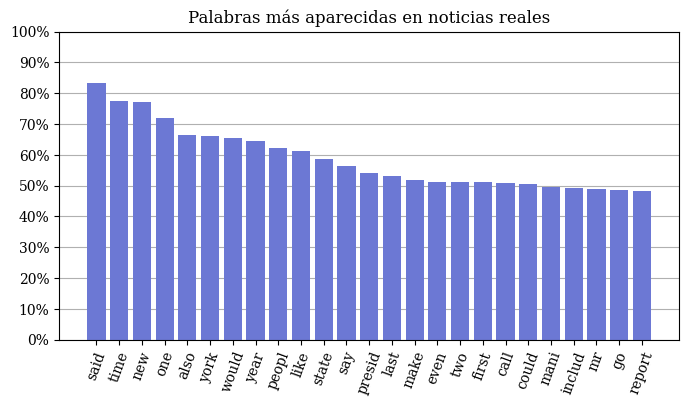

In [47]:
# Calculamos el porcentaje de noticias verdaderas que contienen cada palabra
words_real_df['percentage'] = words_real_df['appearance'] / len(df_clean[df_clean['label']==0]) * 100

# Hacemos un gráfico de barras de las palabras más frecuentes en noticias reales
cantidad_palabras = 25
plt.figure(figsize=(8, 4))
plt.bar(words_real_df.sort_values(by='percentage', ascending=False).head(cantidad_palabras).index, words_real_df.sort_values(by='percentage', ascending=False).head(cantidad_palabras)['percentage'], color='#6c78d4')
plt.title('Palabras más aparecidas en noticias reales')
# plt.xlabel('Palabra')
# plt.ylabel('Noticias')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 110, 10))
plt.xticks(rotation=70)

# Hacemos que en el eje y se muestre el símbolo de porcentaje
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.savefig('../images/palabras_mas_frecuentes_reales_20.png', bbox_inches='tight', dpi=300)
plt.show()

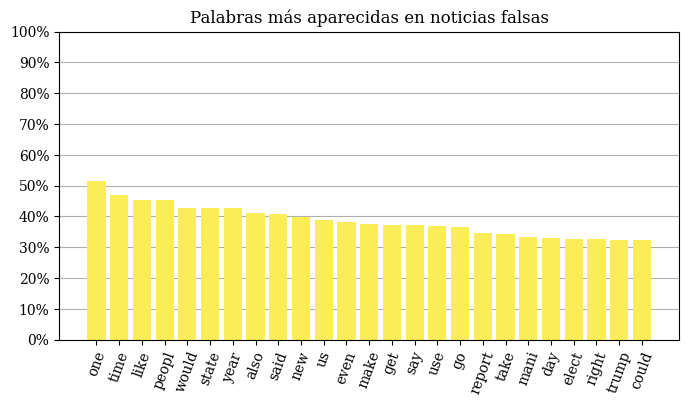

In [48]:
# Calculamos el porcentaje de noticias falsas que contienen cada palabra
words_fake_df['percentage'] = words_fake_df['appearance'] / len(df_clean[df_clean['label']==1]) * 100

# Hacemos un gráfico de barras de las palabras más frecuentes en noticias falsas
cantidad_palabras = 25
plt.figure(figsize=(8, 4))
plt.bar(words_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_palabras).index, words_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_palabras)['percentage'], color='#faed57')
plt.title('Palabras más aparecidas en noticias falsas')
# plt.xlabel('Palabra')
# plt.ylabel('Cantidad')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 110, 10))
plt.xticks(rotation=70)

# Hacemos que en el eje y se muestre el símbolo de porcentaje
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.savefig('../images/palabras_mas_frecuentes_falsas_20.png', bbox_inches='tight', dpi=300)
plt.show()

In [49]:
# Creamos word_intersection para guardar las palabras que aparecen en ambos dataframes
words_intersection = words_real_df.merge(words_fake_df, how='inner', left_index=True, right_index=True, suffixes=('_real', '_fake'))

# Calculamos los ratios de aparición de las palabras en ambos dataframes
words_intersection['ratio_real'] = words_intersection['appearance_real'] / words_intersection['appearance_fake']
words_intersection['ratio_fake'] = words_intersection['appearance_fake'] / words_intersection['appearance_real']
print('Palabras más frecuentes en noticias reales:')
print(words_intersection.sort_values(by='ratio_real', ascending=False).head(10))

Palabras más frecuentes en noticias reales:
            count_real  appearance_real  percentage_real  count_fake  \
huston             125              125         1.203427           1   
nussbaum           123              121         1.164918           8   
joelpollak         127              109         1.049389           1   
jeff_poor          106              106         1.020506           1   
weekday            430              425         4.091653           5   
spicer             803              240         2.310581           3   
automak            225               74         0.712429           4   
semifin            102               63         0.606527           1   
pruitt             312               62         0.596900           2   
regneri            112              109         1.049389           3   

            appearance_fake  percentage_fake  ratio_real  ratio_fake  
huston                    1         0.009603       125.0    0.008000  
nussbaum             

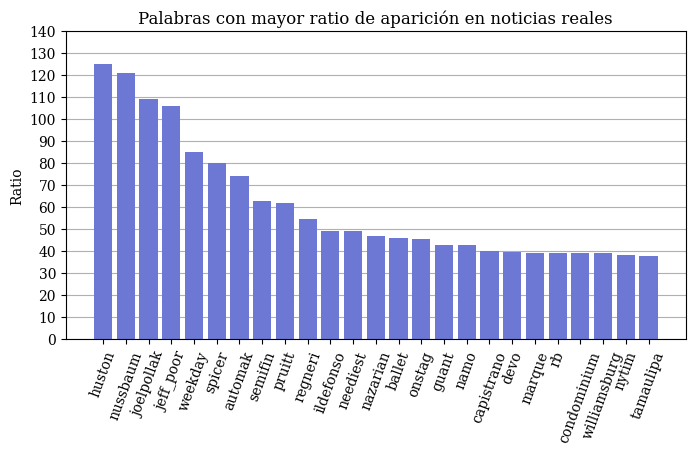

In [51]:
# Hacemos un gráfico de barras de las palabras con más ratio de aparición en noticias reales
cantidad_palabras = 25
plt.figure(figsize=(8, 4))
plt.bar(words_intersection.sort_values(by='ratio_real', ascending=False).head(cantidad_palabras).index, words_intersection.sort_values(by='ratio_real', ascending=False).head(cantidad_palabras)['ratio_real'], color='#6c78d4')
plt.title('Palabras con mayor ratio de aparición en noticias reales')
# plt.xlabel('Palabra')
plt.ylabel('Ratio')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 150, 10))
plt.xticks(rotation=70)

plt.savefig('../images/palabras_mas_ratio_reales_25.png', bbox_inches='tight', dpi=300)
plt.show()

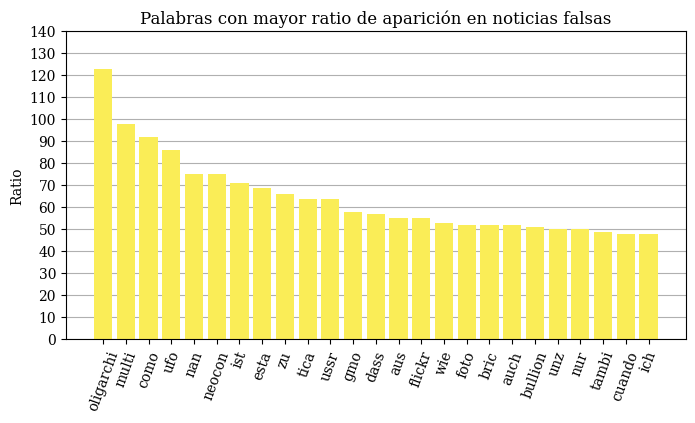

In [52]:
# Hacemos un gráfico de barras de las palabras con más ratio de aparición en noticias falsas
cantidad_palabras = 25
plt.figure(figsize=(8, 4))
plt.bar(words_intersection.sort_values(by='ratio_fake', ascending=False).head(cantidad_palabras).index, words_intersection.sort_values(by='ratio_fake', ascending=False).head(cantidad_palabras)['ratio_fake'], color='#faed57')
plt.title('Palabras con mayor ratio de aparición en noticias falsas')
# plt.xlabel('Palabra')
plt.ylabel('Ratio')
plt.ylim(0, 140)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 150, 10))
plt.xticks(rotation=70)

plt.savefig('../images/palabras_mas_ratio_falsas_25.png', bbox_inches='tight', dpi=300)
plt.show()

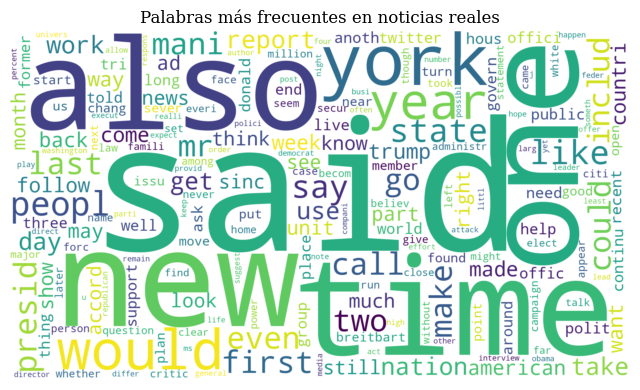

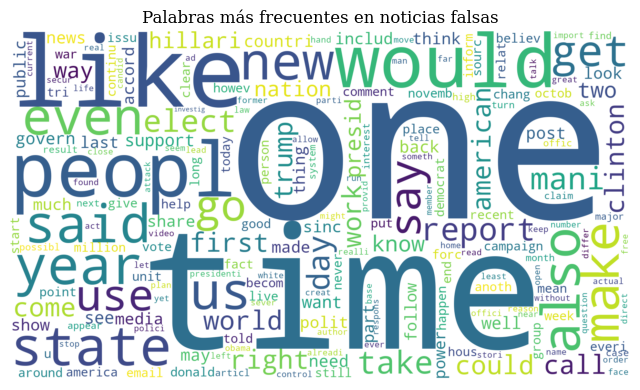

In [53]:
# Hacemos un wordcloud de las 20 palabras más aparecidas en noticias reales que están en words_real_df
wordcloud = WordCloud(width=1920, height=1080, background_color='white', max_words=200).generate_from_frequencies(words_real_df.to_dict()['appearance'])
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')	
plt.title('Palabras más frecuentes en noticias reales')
plt.savefig('../images/palabras_mas_frecuentes_reales_wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

# Hacemos un wordcloud de las 20 palabras más aparecidas en noticias falsas que están en words_fake_df
wordcloud = WordCloud(width=1920, height=1080, background_color='white', max_words=200).generate_from_frequencies(words_fake_df.to_dict()['appearance'])
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en noticias falsas')
plt.savefig('../images/palabras_mas_frecuentes_falsas_wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

### Bigramas

In [58]:
# Utilizamos Counter para calcular la frecuencia de los bigramas por label y en global
bigrams = Counter()
bigrams_real = Counter()
bigrams_fake = Counter()
for idx, row in df_clean.iterrows():
	bigrams.update(ngrams(row['text'].split(), 2))
	if row['label'] == 0:
		bigrams_real.update(ngrams(row['text'].split(), 2))
	else:
		bigrams_fake.update(ngrams(row['text'].split(), 2))
	
# Pasamos a dataframes con ngramas y cantidad
bigrams_df = pd.DataFrame.from_dict(bigrams, orient='index', columns=['count'])
bigrams_real_df = pd.DataFrame.from_dict(bigrams_real, orient='index', columns=['count'])
bigrams_fake_df = pd.DataFrame.from_dict(bigrams_fake, orient='index', columns=['count'])

# Utilizamos Counter para calcular la aparición de bigramas por label y en global
bigrams_appearance = Counter()
bigrams_appearance_real = Counter()
bigrams_appearance_fake = Counter()
for idx, row in df_clean.iterrows():
	bigrams_appearance.update(set(ngrams(row['text'].split(), 2)))
	if row['label'] == 0:
		bigrams_appearance_real.update(set(ngrams(row['text'].split(), 2)))
	else:
		bigrams_appearance_fake.update(set(ngrams(row['text'].split(), 2)))
  
# Añadimos estos datos a los dataframes
bigrams_df['appearance'] = bigrams_df.index.map(bigrams_appearance)
bigrams_real_df['appearance'] = bigrams_real_df.index.map(bigrams_appearance_real)
bigrams_fake_df['appearance'] = bigrams_fake_df.index.map(bigrams_appearance_fake)

In [59]:
# Añadimos una columna con los bigramas divididos por un espacio
bigrams_df['bigram'] = bigrams_df.index.map(lambda x: ' '.join(x))
bigrams_real_df['bigram'] = bigrams_real_df.index.map(lambda x: ' '.join(x))
bigrams_fake_df['bigram'] = bigrams_fake_df.index.map(lambda x: ' '.join(x))

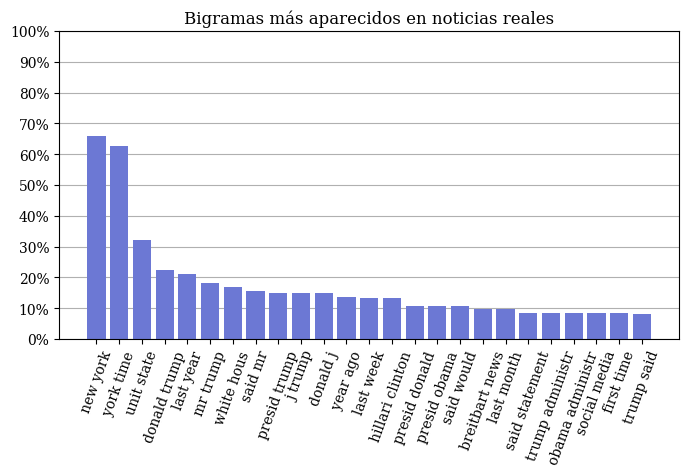

In [60]:
# Calculamos el porcentaje de noticias verdaderas que contienen cada bigrama
bigrams_real_df['percentage'] = bigrams_real_df['appearance'] / len(df_clean[df_clean['label']==0]) * 100

# Hacemos un gráfico de barras de los bigramas más frecuentes en noticias reales
cantidad_bigramas = 25	
plt.figure(figsize=(8, 4))
plt.bar(bigrams_real_df.sort_values(by='percentage', ascending=False).head(cantidad_bigramas)['bigram'], bigrams_real_df.sort_values(by='percentage', ascending=False).head(cantidad_bigramas)['percentage'], color='#6c78d4')
plt.title('Bigramas más aparecidos en noticias reales')
# plt.xlabel('Bigrama')
# plt.ylabel('Noticias')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 110, 10))
plt.xticks(rotation=70)

# Hacemos que en el eje y se muestre el símbolo de porcentaje
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.savefig('../images/bigramas_mas_frecuentes_reales_25.png', bbox_inches='tight', dpi=300)
plt.show()

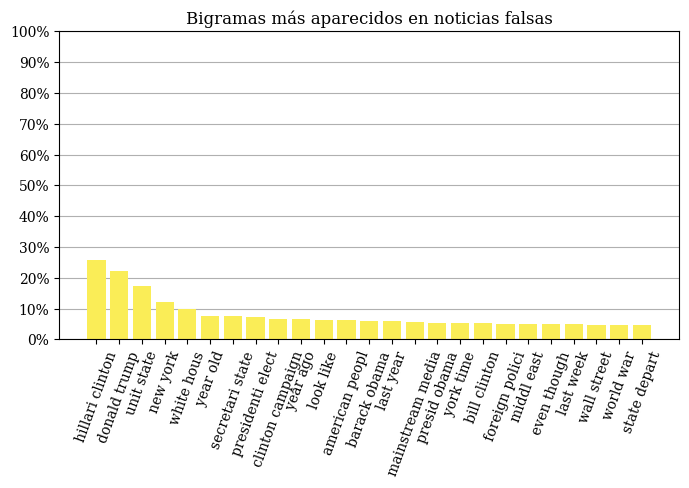

In [62]:
# Calculamos el porcentaje de noticias falsas que contienen cada bigrama
bigrams_fake_df['percentage'] = bigrams_fake_df['appearance'] / len(df_clean[df_clean['label']==1]) * 100

# Hacemos un gráfico de barras de los bigramas más frecuentes en noticias falsas
cantidad_bigramas = 25	
plt.figure(figsize=(8, 4))
plt.bar(bigrams_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_bigramas)['bigram'], bigrams_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_bigramas)['percentage'], color='#faed57')
plt.title('Bigramas más aparecidos en noticias falsas')
# plt.xlabel('Bigrama')
# plt.ylabel('Noticias')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 110, 10))
plt.xticks(rotation=70)

# Hacemos que en el eje y se muestre el símbolo de porcentaje
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.savefig('../images/bigramas_mas_frecuentes_falsas_25.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
#Creamos nubes de bigramas más frecuentes en noticias reales y falsas
wordcloud = WordCloud(width=1920, height=1080, background_color='white', max_words=200).generate_from_frequencies(bigrams_real_df.to_dict()['count'])
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bigramas más frecuentes en noticias reales')
plt.savefig('../images/ngramas_mas_frecuentes_reales_wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

wordcloud = WordCloud(width=1920, height=1080, background_color='white', max_words=200).generate_from_frequencies(bigrams_fake_df.to_dict()['count'])
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bigramas más frecuentes en noticias falsas')
plt.savefig('../images/ngramas_mas_frecuentes_falsas_wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

In [66]:
# Creamos bigram_intersection para guardar los bigramas que aparecen en ambos dataframes
bigrams_intersection = bigrams_real_df.merge(bigrams_fake_df, how='inner', left_index=True, right_index=True, suffixes=('_real', '_fake'))

# Le añadimos el campo 'bigram'
bigrams_intersection['bigram'] = bigrams_intersection.index.map(lambda x: ' '.join(x))

# Calculamos los ratios de aparición de los bigramas en ambos dataframes
bigrams_intersection['ratio_real'] = bigrams_intersection['appearance_real'] / bigrams_intersection['appearance_fake']
bigrams_intersection['ratio_fake'] = bigrams_intersection['appearance_fake'] / bigrams_intersection['appearance_real']

Bigramas más frecuentes en noticias reales:
                     count_real  appearance_real       bigram_real  \
(said, ms)                  646              490           said ms   
(weekday, eastern)          285              285   weekday eastern   
(p, eastern)                216              185         p eastern   
(n, j)                      187              156               n j   
(siriusxm, patriot)         156              155  siriusxm patriot   
(even, latest)              152              152       even latest   
(post, p)                   149              149            post p   
(suggest, mr)               160              148        suggest mr   
(g, p)                      205              145               g p   
(travel, ban)               248              139        travel ban   

                     percentage_real  count_fake  appearance_fake  \
(said, ms)                  4.717435           1                1   
(weekday, eastern)          2.743814           

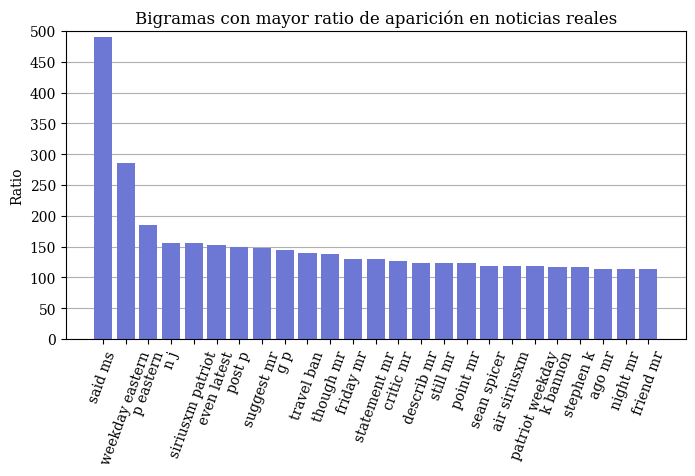

In [70]:
# Hacemos un gráfico de barras de los bigramas con más ratio de aparición en noticias reales
cantidad_bigramas = 25
plt.figure(figsize=(8, 4))
plt.bar(bigrams_intersection.sort_values(by='ratio_real', ascending=False).head(cantidad_bigramas)['bigram'], bigrams_intersection.sort_values(by='ratio_real', ascending=False).head(cantidad_bigramas)['ratio_real'], color='#6c78d4')
plt.title('Bigramas con mayor ratio de aparición en noticias reales')
# plt.xlabel('Bigrama')
plt.ylabel('Ratio')
plt.ylim(0, 500)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 550, 50))
plt.xticks(rotation=70)

plt.savefig('../images/bigramas_mas_ratio_reales_25.png', bbox_inches='tight', dpi=300)
plt.show()

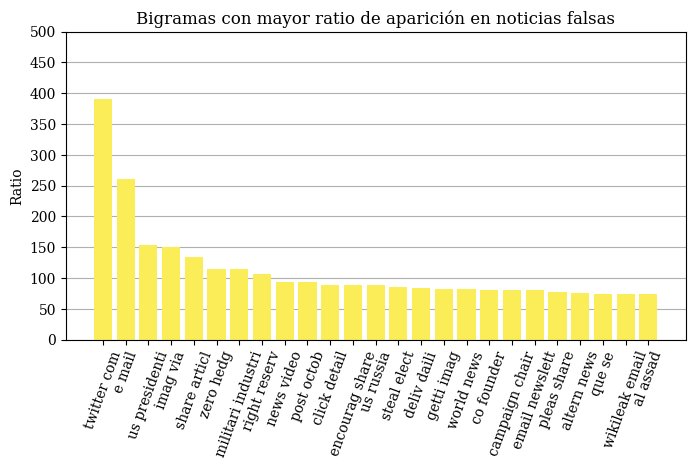

In [71]:
# Hacemos un gráfico de barras de los bigramas con más ratio de aparición en noticias falsas
cantidad_bigramas = 25
plt.figure(figsize=(8, 4))
plt.bar(bigrams_intersection.sort_values(by='ratio_fake', ascending=False).head(cantidad_bigramas)['bigram'], bigrams_intersection.sort_values(by='ratio_fake', ascending=False).head(cantidad_bigramas)['ratio_fake'], color='#faed57')
plt.title('Bigramas con mayor ratio de aparición en noticias falsas')
# plt.xlabel('Bigrama')
plt.ylabel('Ratio')
plt.ylim(0, 500)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 550, 50))
plt.xticks(rotation=70)

plt.savefig('../images/bigramas_mas_ratio_falsos_25.png', bbox_inches='tight', dpi=300)
plt.show()

#### Trigramas

In [5]:
# Utilizamos Counter para calcular la frecuencia de los trigramas por label y en global
trigrams = Counter()
trigrams_real = Counter()
trigrams_fake = Counter()
for idx, row in df_clean.iterrows():
	trigrams.update(ngrams(row['text'].split(), 3))
	if row['label'] == 0:
		trigrams_real.update(ngrams(row['text'].split(), 3))
	else:
		trigrams_fake.update(ngrams(row['text'].split(), 3))
  
# Pasamos a dataframes con ngramas y cantidad
trigrams_df = pd.DataFrame.from_dict(trigrams, orient='index', columns=['count'])
trigrams_real_df = pd.DataFrame.from_dict(trigrams_real, orient='index', columns=['count'])
trigrams_fake_df = pd.DataFrame.from_dict(trigrams_fake, orient='index', columns=['count'])

# Utilizamos Counter para calcular la aparición de trigramas por label y en global
trigrams_appearance = Counter()
trigrams_appearance_real = Counter()
trigrams_appearance_fake = Counter()
for idx, row in df_clean.iterrows():
	trigrams_appearance.update(set(ngrams(row['text'].split(), 3)))
	if row['label'] == 0:
		trigrams_appearance_real.update(set(ngrams(row['text'].split(), 3)))
	else:
		trigrams_appearance_fake.update(set(ngrams(row['text'].split(), 3)))
  
# Añadimos estos datos a los dataframes
trigrams_df['appearance'] = trigrams_df.index.map(trigrams_appearance)
trigrams_real_df['appearance'] = trigrams_real_df.index.map(trigrams_appearance_real)
trigrams_fake_df['appearance'] = trigrams_fake_df.index.map(trigrams_appearance_fake)

In [6]:
# Añadimos una columna con los trigramas divididos por un espacio
trigrams_df['trigram'] = trigrams_df.index.map(lambda x: ' '.join(x))
trigrams_real_df['trigram'] = trigrams_real_df.index.map(lambda x: ' '.join(x))
trigrams_fake_df['trigram'] = trigrams_fake_df.index.map(lambda x: ' '.join(x))

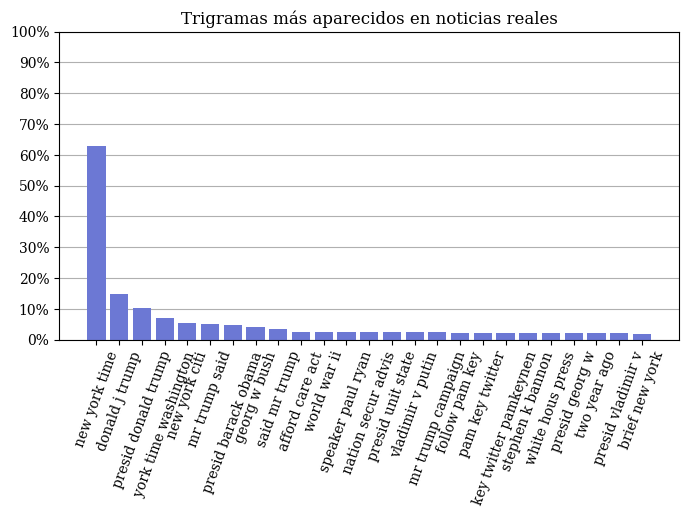

In [7]:
# Calculamos el porcentaje de noticias verdaderas que contienen cada trigramas
trigrams_real_df['percentage'] = trigrams_real_df['appearance'] / len(df_clean[df_clean['label']==0]) * 100

# Hacemos un gráfico de barras de los trigramas más frecuentes en noticias reales
cantidad_trigramas = 25
plt.figure(figsize=(8, 4))
plt.bar(trigrams_real_df.sort_values(by='percentage', ascending=False).head(cantidad_trigramas)['trigram'], trigrams_real_df.sort_values(by='percentage', ascending=False).head(cantidad_trigramas)['percentage'], color='#6c78d4')
plt.title('Trigramas más aparecidos en noticias reales')
# plt.xlabel('Trigrama')
# plt.ylabel('Noticias')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 110, 10))
plt.xticks(rotation=70)

# Hacemos que en el eje y se muestre el símbolo de porcentaje
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.savefig('../images/trigramas_mas_frecuentes_reales_25.png', bbox_inches='tight', dpi=300)
plt.show()

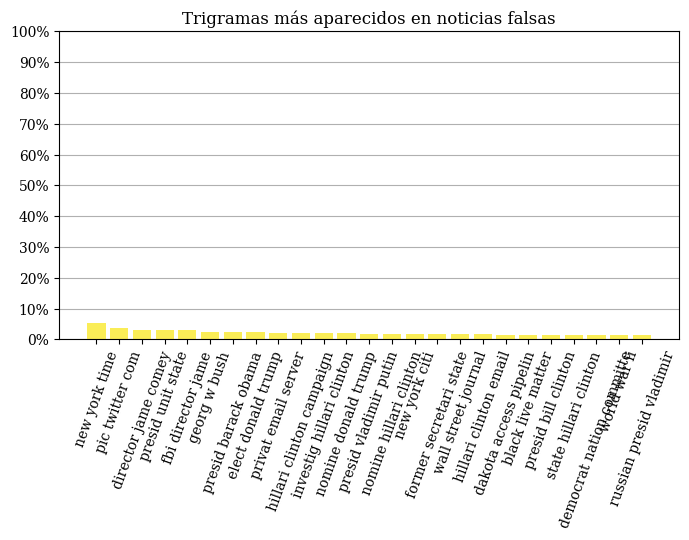

In [11]:
# Calculamos el porcentaje de noticias falsas que contienen cada trigramas
trigrams_fake_df['percentage'] = trigrams_fake_df['appearance'] / len(df_clean[df_clean['label']==1]) * 100

# Hacemos un gráfico de barras de los trigramas más frecuentes en noticias falsas
cantidad_trigramas = 25
plt.figure(figsize=(8, 4))
plt.bar(trigrams_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_trigramas)['trigram'], trigrams_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_trigramas)['percentage'], color='#faed57')
plt.title('Trigramas más aparecidos en noticias falsas')
# plt.xlabel('Trigrama')
# plt.ylabel('Noticias')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 110, 10))
plt.xticks(rotation=70)

# Hacemos que en el eje y se muestre el símbolo de porcentaje
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.savefig('../images/trigramas_mas_frecuentes_falsas_25.png', bbox_inches='tight', dpi=300)
plt.show()

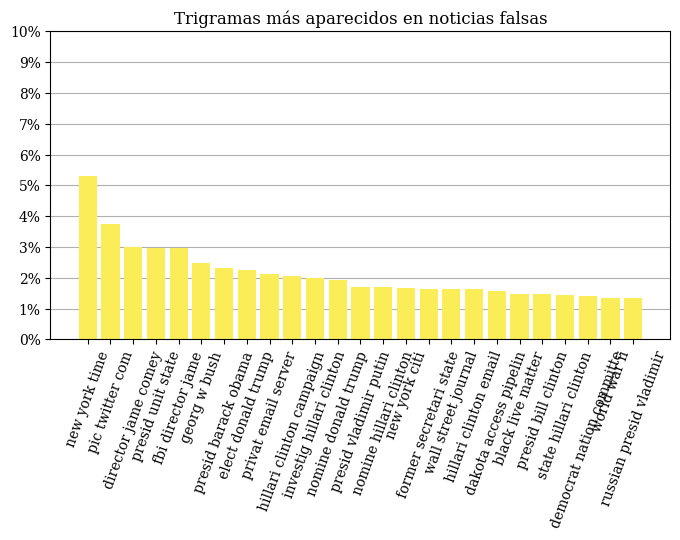

In [10]:
# Calculamos el porcentaje de noticias falsas que contienen cada trigramas
trigrams_fake_df['percentage'] = trigrams_fake_df['appearance'] / len(df_clean[df_clean['label']==1]) * 100

# Hacemos un gráfico de barras de los trigramas más frecuentes en noticias falsas
cantidad_trigramas = 25
plt.figure(figsize=(8, 4))
plt.bar(trigrams_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_trigramas)['trigram'], trigrams_fake_df.sort_values(by='percentage', ascending=False).head(cantidad_trigramas)['percentage'], color='#faed57')
plt.title('Trigramas más aparecidos en noticias falsas')
# plt.xlabel('Trigrama')
# plt.ylabel('Noticias')
plt.ylim(0, 10)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 11, 1))
plt.xticks(rotation=70)

# Hacemos que en el eje y se muestre el símbolo de porcentaje
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.savefig('../images/trigramas_mas_frecuentes_falsas_25_zoom.png', bbox_inches='tight', dpi=300)
plt.show()

In [12]:
# Creamos bigram_intersection para guardar los bigramas que aparecen en ambos dataframes
trigrams_intersection = trigrams_real_df.merge(trigrams_fake_df, how='inner', left_index=True, right_index=True, suffixes=('_real', '_fake'))

# Le añadimos el campo 'trigram'
trigrams_intersection['trigram'] = trigrams_intersection.index.map(lambda x: ' '.join(x))

# Calculamos los ratios de aparición de los trigramas en ambos dataframes
trigrams_intersection['ratio_real'] = trigrams_intersection['appearance_real'] / trigrams_intersection['appearance_fake']
trigrams_intersection['ratio_fake'] = trigrams_intersection['appearance_fake'] / trigrams_intersection['appearance_real']


Trigramas más frecuentes en noticias reales:
                             count_real  appearance_real  \
(support, mr, trump)                245              201   
(like, want, see)                   167              167   
(critic, mr, trump)                 158              146   
(former, presid, barack)            143              142   
(attorney, general, jeff)           146              134   
(call, mr, trump)                   151              127   
(look, back, last)                  122              122   
(mr, trump, made)                   137              122   
(patriot, weekday, eastern)         118              118   
(air, siriusxm, patriot)            118              118   

                                        trigram_real  percentage_real  \
(support, mr, trump)                support mr trump         1.935111   
(like, want, see)                      like want see         1.607779   
(critic, mr, trump)                  critic mr trump         1.405603   
(f

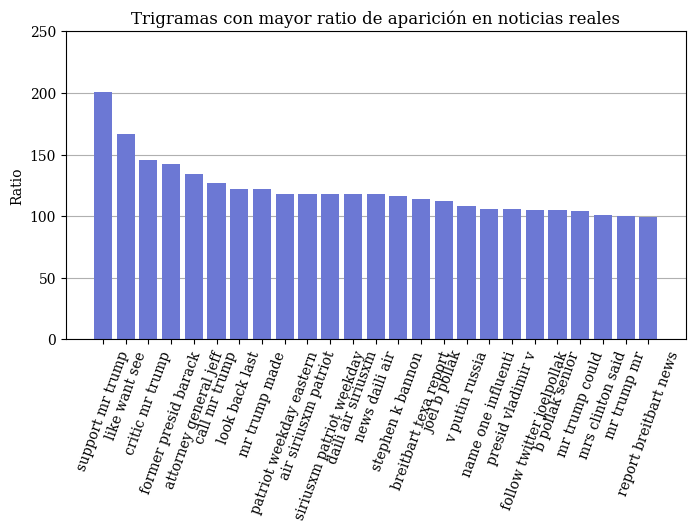

In [17]:
# Hacer un gráfico de barras de los trigramas con más ratio de aparición en noticias reales
cantidad_trigramas = 25
plt.figure(figsize=(8, 4))
plt.bar(trigrams_intersection.sort_values(by='ratio_real', ascending=False).head(cantidad_trigramas)['trigram'], trigrams_intersection.sort_values(by='ratio_real', ascending=False).head(cantidad_trigramas)['ratio_real'], color='#6c78d4')
plt.title('Trigramas con mayor ratio de aparición en noticias reales')
# plt.xlabel('Trigrama')
plt.ylabel('Ratio')
plt.ylim(0, 250)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 300, 50))
plt.xticks(rotation=70)

plt.savefig('../images/trigramas_mas_ratio_reales_25.png', bbox_inches='tight', dpi=300)
plt.show()

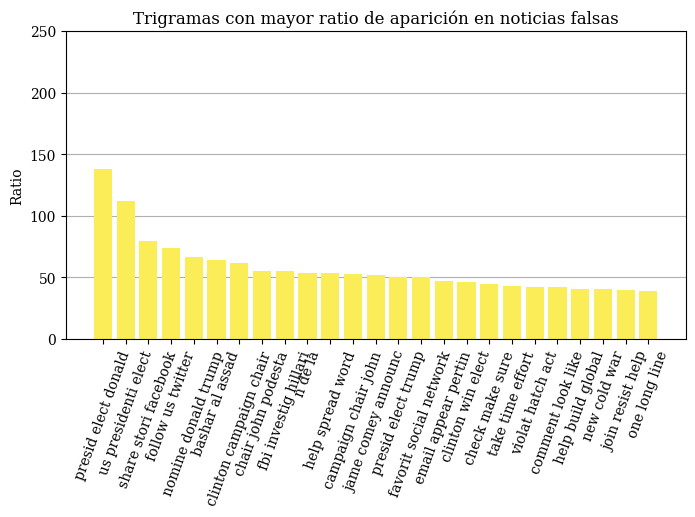

In [16]:
# Hacer un gráfico de barras de los trigramas con más ratio de aparición en noticias falsas
cantidad_trigramas = 25
plt.figure(figsize=(8, 4))
plt.bar(trigrams_intersection.sort_values(by='ratio_fake', ascending=False).head(cantidad_trigramas)['trigram'], trigrams_intersection.sort_values(by='ratio_fake', ascending=False).head(cantidad_trigramas)['ratio_fake'], color='#faed57')
plt.title('Trigramas con mayor ratio de aparición en noticias falsas')
# plt.xlabel('Trigrama')
plt.ylabel('Ratio')
plt.ylim(0, 250)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, which='major')
plt.gca().set_yticks(np.arange(0, 300, 50))
plt.xticks(rotation=70)

plt.savefig('../images/trigramas_mas_ratio_falsos_25.png', bbox_inches='tight', dpi=300)
plt.show()